# Import Libraries and get data

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import naive_bayes
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score , ConfusionMatrixDisplay , classification_report , roc_curve
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# File path on Google Drive
file_path = '/content/drive/My Drive/Research_Internship/train.csv'

# Read CSV file
df = pd.read_csv(file_path)

# Display the DataFrame
print(df.head())

Mounted at /content/drive
   id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1  


In [ ]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


# Pre-Processing without Stemming

In [ ]:
print(df.isnull().sum())
print('--------------------------')

id           0
title      558
author    1957
text        39
label        0
dtype: int64
--------------------------


In [ ]:
#As we have a very large dataset, we can replace the missing values with ull which will not effect the dataset much
#Had it been a small dataset then we would have to replace with some other values
df.fillna(" ", inplace=True)

In [ ]:
print(df.isnull().sum())
print('--------------------------')

id        0
title     0
author    0
text      0
label     0
dtype: int64
--------------------------


In [ ]:
#merging title and author name
df['content'] = df['title']+' '+df['author']

In [ ]:
port_stem=PorterStemmer()
def stemming(content):
    #replace any non-alphabetic characters in the content variable with a space character
    stemmed_content= re.sub('[^a-zA-Z]',' ',content)
    #Convert all words into lower case letters
    stemmed_content = stemmed_content.lower()
    # Split the words into list
    stemmed_content = stemmed_content.split()
    #generate a list of stemmed words from stemmed_content, excluding any stop words from the list
    # stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    #Join the elements from the list 'stemmed_content' into a single string separated by spaces
    stemmed_content = " ".join(stemmed_content)
    return stemmed_content
df['content']= df['content'].apply(stemming)
df['content']

0        house dem aide we didn t even see comey s lett...
1        flynn hillary clinton big woman on campus brei...
2        why the truth might get you fired consortiumne...
3        civilians killed in single us airstrike have b...
4        iranian woman jailed for fictional unpublished...
                               ...                        
20795    rapper t i trump a poster child for white supr...
20796    n f l playoffs schedule matchups and odds the ...
20797    macy s is said to receive takeover approach by...
20798    nato russia to hold parallel exercises in balk...
20799                 what keeps the f alive david swanson
Name: content, Length: 20800, dtype: object

In [ ]:
transformer = TfidfTransformer(smooth_idf=False)
count_vectorizer = CountVectorizer(ngram_range=(1,4), max_features=5000)
counts = count_vectorizer.fit_transform(df['content'].values)
tfidf = transformer.fit_transform(counts)

# Splitting Data

In [ ]:
targets=df['label'].values
print(f"target shape: {targets.shape}")
print(f"X shape: {tfidf.shape}")
X_train, X_test, y_train, y_test = train_test_split(tfidf, targets, test_size=0.3, random_state=None)
print(f"The shape of X_train is: {X_train.shape[0]}")
print(f"The shape of X_test is: {X_test.shape[0]}")

target shape: (20800,)
X shape: (20800, 5000)
The shape of X_train is: 14560
The shape of X_test is: 6240


In [ ]:
def train(model , model_name):
    model.fit(X_train,y_train)
    print(f"Training accuracy of {model_name} is {model.score(X_train,y_train)}")
    print(f"testing accuracy of {model_name} is {model.score(X_test,y_test)}")
def conf_matrix(model):
    ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test
    )
def class_report(model):
    print(classification_report(
        y_test,
        model.predict(X_test)
    ))

# Logistic Regression

Normal fitting is done => We can vitness Overfitting as test accuracy>train accuracy

In [ ]:
train(LogisticRegression(), 'Logistic Regreesion')

Training accuracy of Logistic Regreesion is 0.9902472527472528
testing accuracy of Logistic Regreesion is 0.9863782051282052


Cross-Validation => We suspect overfitting as test data accuracy is still less than training data accuracy.

We should know difference between K-fold and Stratified K-Fold

In [ ]:
# Perform cross-validation
from sklearn.model_selection import cross_val_score

cross_val_scores_train = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)
cross_val_scores_test = cross_val_score(LogisticRegression(), X_test, y_test, cv=5)

print(f"Cross-validation scores: {cross_val_scores_train}")
print(f"Mean cross-validation score: {cross_val_scores_train.mean()}")

print(f"Cross-validation scores: {cross_val_scores_test}")
print(f"Mean cross-validation score: {cross_val_scores_test.mean()}")

Cross-validation scores: [0.98214286 0.98523352 0.98385989 0.97836538 0.98008242]
Mean cross-validation score: 0.9819368131868131
Cross-validation scores: [0.96794872 0.96875    0.96073718 0.96314103 0.97115385]
Mean cross-validation score: 0.9663461538461539


10-cross-fold validation


In [ ]:
# Perform cross-validation
from sklearn.model_selection import cross_val_score

cross_val_scores_train = cross_val_score(LogisticRegression(), X_train, y_train, cv=15)
cross_val_scores_test = cross_val_score(LogisticRegression(), X_test, y_test, cv=15)

print(f"Cross-validation scores: {cross_val_scores_train}")
print(f"Mean cross-validation score: {cross_val_scores_train.mean()}")

print(f"Cross-validation scores: {cross_val_scores_test}")
print(f"Mean cross-validation score: {cross_val_scores_test.mean()}")

Cross-validation scores: [0.98455201 0.98146241 0.98352214 0.99176107 0.98867147 0.98043254
 0.98043254 0.98455201 0.98970134 0.97940268 0.98041237 0.9814433
 0.98453608 0.98556701 0.98041237]
Mean cross-validation score: 0.9837907566861669
Cross-validation scores: [0.96634615 0.96153846 0.98317308 0.98317308 0.97836538 0.95673077
 0.95913462 0.96394231 0.96634615 0.99038462 0.96634615 0.94471154
 0.98076923 0.97355769 0.97836538]
Mean cross-validation score: 0.9701923076923076


Cross-Validation + Regularization => We suspect overfitting as test data accuracy is still less than training data accuracy

In [ ]:
# Perform cross-validation
from sklearn.model_selection import cross_val_score

cross_val_scores_train = cross_val_score(LogisticRegression(C=0.1), X_train, y_train, cv=5)
cross_val_scores_test = cross_val_score(LogisticRegression(C=0.1), X_test, y_test, cv=5)

print(f"Cross-validation scores: {cross_val_scores_train}")
print(f"Mean cross-validation score: {cross_val_scores_train.mean()}")

print(f"Cross-validation scores: {cross_val_scores_test}")
print(f"Mean cross-validation score: {cross_val_scores_test.mean()}")

Cross-validation scores: [0.94024725 0.94539835 0.93853022 0.93406593 0.93543956]
Mean cross-validation score: 0.9387362637362637
Cross-validation scores: [0.90544872 0.91266026 0.89903846 0.91266026 0.91666667]
Mean cross-validation score: 0.9092948717948719


10-cross-fold

In [ ]:
# Perform cross-validation
from sklearn.model_selection import cross_val_score

cross_val_scores_train = cross_val_score(LogisticRegression(C=0.1), X_train, y_train, cv=30)
cross_val_scores_test = cross_val_score(LogisticRegression(C=0.1), X_test, y_test, cv=30)

print(f"Cross-validation scores: {cross_val_scores_train}")
print(f"Mean cross-validation score: {cross_val_scores_train.mean()}")

print(f"Cross-validation scores: {cross_val_scores_test}")
print(f"Mean cross-validation score: {cross_val_scores_test.mean()}")

Cross-validation scores: [0.94444444 0.94650206 0.94650206 0.94238683 0.9526749  0.93621399
 0.9526749  0.95679012 0.94855967 0.95679012 0.94226804 0.94226804
 0.94226804 0.94639175 0.94845361 0.94020619 0.94845361 0.94020619
 0.93608247 0.93814433 0.94226804 0.94639175 0.93814433 0.94639175
 0.9443299  0.95257732 0.93814433 0.92989691 0.92989691 0.94226804]
Mean cross-validation score: 0.9439530213680652
Cross-validation scores: [0.9375     0.92307692 0.88942308 0.91346154 0.94711538 0.89423077
 0.94711538 0.91346154 0.93269231 0.92307692 0.92788462 0.88461538
 0.87980769 0.91826923 0.89903846 0.91826923 0.89423077 0.92307692
 0.9375     0.93269231 0.91826923 0.89903846 0.94230769 0.89423077
 0.89423077 0.94230769 0.92307692 0.94230769 0.92307692 0.87980769]
Mean cross-validation score: 0.9165064102564104


Regularization

In [ ]:
lr=LogisticRegression(C=0.07)

In [ ]:
train(lr, 'Logistic Regreesion')

Training accuracy of Logistic Regreesion is 0.9383241758241758
testing accuracy of Logistic Regreesion is 0.9352564102564103


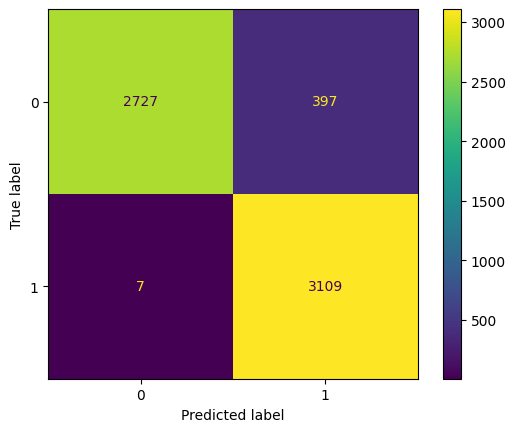

In [ ]:
conf_matrix(lr)

In [ ]:
class_report(lr)

              precision    recall  f1-score   support

           0       1.00      0.87      0.93      3124
           1       0.89      1.00      0.94      3116

    accuracy                           0.94      6240
   macro avg       0.94      0.94      0.94      6240
weighted avg       0.94      0.94      0.94      6240



# Extra Logistic -> Randomized Search, Graph Plot

In [ ]:
# # Perform randomized search for hyperparameter tuning
# from sklearn.model_selection import RandomizedSearchCV
# param_grid = {'C': [0.07]}
# random_search = RandomizedSearchCV(LogisticRegression(), param_grid, cv=5, return_train_score=True)
# random_search.fit(X_train, y_train)

# # Print best hyperparameters and mean cross-validation score
# print("Best Hyperparameters: ", random_search.cv_results_)
# print("Mean Cross-validation Score: ", random_search.best_score_)

# # Train and evaluate the model with the best hyperparameters
# best_model_lr = random_search.best_estimator_
# train(best_model_lr, 'LogisticRegression')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameters:  {'mean_fit_time': array([0.07585082]), 'std_fit_time': array([0.00549411]), 'mean_score_time': array([0.00203962]), 'std_score_time': array([0.00060143]), 'param_C': masked_array(data=[0.07],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.07}], 'split0_test_score': array([0.92582418]), 'split1_test_score': array([0.92032967]), 'split2_test_score': array([0.93200549]), 'split3_test_score': array([0.93028846]), 'split4_test_score': array([0.92582418]), 'mean_test_score': array([0.9268544]), 'std_test_score': array([0.00407483]), 'rank_test_score': array([1], dtype=int32), 'split0_train_score': array([0.93037431]), 'split1_train_score': array([0.93063187]), 'split2_train_score': array([0.92797047]), 'split3_train_score': array([0.93063187]), 'split4_train_score': array([0.93140453]), 'mean_train_score': array([0.93020261]), 'std_train_score': array([0.00116834])}
Mean Cross-validation Score:  0.9268543956043956
Traini

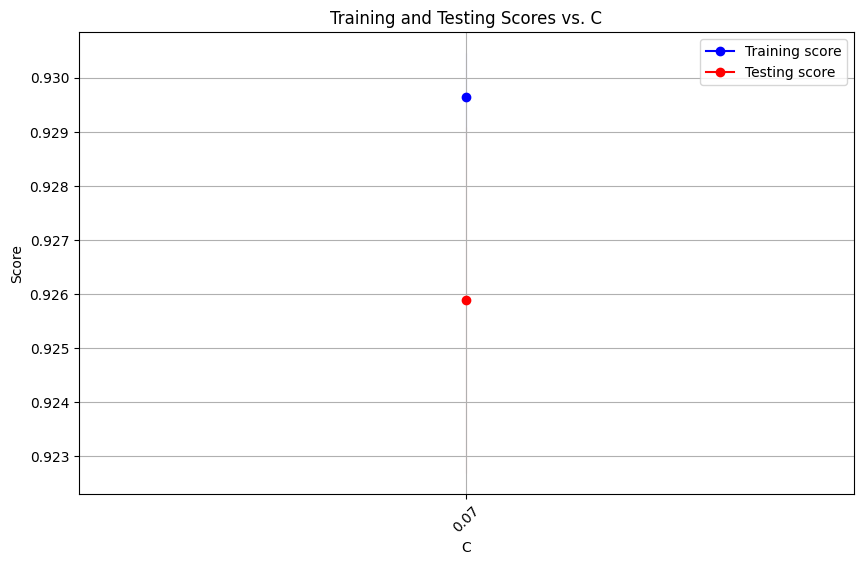

In [ ]:
# import matplotlib.pyplot as plt

# train_scores_mean = random_search.cv_results_['mean_train_score']
# train_scores_std = random_search.cv_results_['std_train_score']
# test_scores_mean = random_search.cv_results_['mean_test_score']
# test_scores_std = random_search.cv_results_['std_test_score']
# param_C_values = [str(c) for c in param_grid['C']]

# plt.figure(figsize=(10, 6))
# plt.title("Training and Testing Scores vs. C")
# plt.xlabel("C")
# plt.ylabel("Score")
# plt.grid()

# plt.fill_between(param_C_values, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.1, color="b")
# plt.fill_between(param_C_values, test_scores_mean - test_scores_std,
#                  test_scores_mean + test_scores_std, alpha=0.1, color="r")
# plt.plot(param_C_values, train_scores_mean, 'o-', color="b",
#          label="Training score")
# plt.plot(param_C_values, test_scores_mean, 'o-', color="r",
#          label="Testing score")

# plt.legend(loc="best")
# plt.xticks(rotation=45)
# plt.show()


If the training score is significantly higher than the testing score across all C values, it suggests that the model is overfitting. This is indicated by a larger gap between the training and testing scores, with the training score being close to 1.0 while the testing score is noticeably lower.

On the other hand, if both the training and testing scores are relatively low, it indicates underfitting. In this case, the model may not have captured the underlying patterns in the data and is not performing well on either the training or testing data.

If the training and testing scores are both high and relatively close to each other, it suggests a good balance between fitting the training data and generalization to unseen data.

In [ ]:
# for i in np.arange(0.01,0.11,0.01):
#   print(i)
#   # model_lr =
#   train(LogisticRegression(C=i), 'LogisticRegression')



0.01
Training accuracy of LogisticRegression is 0.8418269230769231
testing accuracy of LogisticRegression is 0.8411858974358974
0.02
Training accuracy of LogisticRegression is 0.8851648351648351
testing accuracy of LogisticRegression is 0.8814102564102564
0.03
Training accuracy of LogisticRegression is 0.9074862637362637
testing accuracy of LogisticRegression is 0.9030448717948718
0.04
Training accuracy of LogisticRegression is 0.920054945054945
testing accuracy of LogisticRegression is 0.9137820512820513
0.05
Training accuracy of LogisticRegression is 0.9273351648351649
testing accuracy of LogisticRegression is 0.9217948717948717
0.060000000000000005
Training accuracy of LogisticRegression is 0.9328296703296703
testing accuracy of LogisticRegression is 0.927724358974359
0.06999999999999999
Training accuracy of LogisticRegression is 0.9385989010989011
testing accuracy of LogisticRegression is 0.9323717948717949
0.08
Training accuracy of LogisticRegression is 0.9431318681318681
testing 

# SVM

Normal Fit

In [ ]:
svc_model = SVC(probability=True)
train(svc_model,"SVM")

Training accuracy of SVM is 0.998282967032967
testing accuracy of SVM is 0.9910256410256411


Regularization

In [ ]:
# for i in np.arange(0.01,0.11,0.01):
#   print(i)
#   train(SVC(probability=True, C=i), 'SVM')


Cross Validation

5 cross-fold

In [ ]:
# Perform cross-validation
from sklearn.model_selection import cross_val_score

cross_val_scores_svm_train = cross_val_score(SVC(probability=True), X_train, y_train, cv=10)
cross_val_scores_svm_test = cross_val_score(SVC(probability=True), X_test, y_test, cv=10)

print(f"Cross-validation scores: {cross_val_scores_svm_train}")
print(f"Mean cross-validation score: {cross_val_scores_svm_train.mean()}")

print(f"Cross-validation scores: {cross_val_scores_svm_test}")
print(f"Mean cross-validation score: {cross_val_scores_svm_test.mean()}")

10 cross-fold

In [ ]:
# Perform cross-validation
from sklearn.model_selection import cross_val_score

cross_val_scores_svm_train = cross_val_score(SVC(probability=True), X_train, y_train, cv=10)
cross_val_scores_svm_test = cross_val_score(SVC(probability=True), X_test, y_test, cv=10)

print(f"Cross-validation scores: {cross_val_scores_svm_train}")
print(f"Mean cross-validation score: {cross_val_scores_svm_train.mean()}")

print(f"Cross-validation scores: {cross_val_scores_svm_test}")
print(f"Mean cross-validation score: {cross_val_scores_svm_test.mean()}")

Cross-validation scores: [0.97321429 0.96497253 0.96497253 0.96771978 0.96634615 0.97321429
 0.96840659 0.96497253 0.96771978 0.9635989 ]
Mean cross-validation score: 0.9675137362637363
Cross-validation scores: [0.96474359 0.95673077 0.96634615 0.95032051 0.96794872 0.97275641
 0.96634615 0.96314103 0.9599359  0.96314103]
Mean cross-validation score: 0.9631410256410255


Cross- Validation+Regularization

In [ ]:
# Perform randomized search for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'C': [0.1]}
random_search = RandomizedSearchCV(SVC(probability=True), param_grid, cv=10, return_train_score=True)
random_search.fit(X_train, y_train)

# Print best hyperparameters and mean cross-validation score
print("Best Hyperparameters: ", random_search.cv_results_)
print("Mean Cross-validation Score: ", random_search.best_score_)

# Train and evaluate the model with the best hyperparameters
best_model_svm = random_search.best_estimator_
train(best_model_svm, 'LogisticRegression')
# print(f"Mean cross-validation score: {best_model_svm.mean()}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameters:  {'mean_fit_time': array([122.43248823]), 'std_fit_time': array([0.95772929]), 'mean_score_time': array([2.47854509]), 'std_score_time': array([0.28996312]), 'param_C': masked_array(data=[0.1],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.1}], 'split0_test_score': array([0.94230769]), 'split1_test_score': array([0.93681319]), 'split2_test_score': array([0.93818681]), 'split3_test_score': array([0.93200549]), 'split4_test_score': array([0.93543956]), 'split5_test_score': array([0.93131868]), 'split6_test_score': array([0.93543956]), 'split7_test_score': array([0.92857143]), 'split8_test_score': array([0.94093407]), 'split9_test_score': array([0.93475275]), 'mean_test_score': array([0.93557692]), 'std_test_score': array([0.00403762]), 'rank_test_score': array([1], dtype=int32), 'split0_train_score': array([0.94223138]), 'split1_train_score': array([0.94261294]), 'split2_train_score': array([0.94268926]), 'split3_tra

In [ ]:
class_report(best_model_svm)

              precision    recall  f1-score   support

           0       1.00      0.88      0.94      3099
           1       0.90      1.00      0.94      3141

    accuracy                           0.94      6240
   macro avg       0.95      0.94      0.94      6240
weighted avg       0.95      0.94      0.94      6240



In [ ]:
import matplotlib.pyplot as plt

train_scores_mean = random_search.cv_results_['mean_train_score']
train_scores_std = random_search.cv_results_['std_train_score']
test_scores_mean = random_search.cv_results_['mean_test_score']
test_scores_std = random_search.cv_results_['std_test_score']
param_C_values = [str(c) for c in param_grid['C']]

plt.figure(figsize=(10, 6))
plt.title("Training and Testing Scores vs. C")
plt.xlabel("C")
plt.ylabel("Score")
plt.grid()

plt.fill_between(param_C_values, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="b")
plt.fill_between(param_C_values, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="r")
plt.plot(param_C_values, train_scores_mean, 'o-', color="b",
         label="Training score")
plt.plot(param_C_values, test_scores_mean, 'o-', color="r",
         label="Testing score")

plt.legend(loc="best")
plt.xticks(rotation=45)
plt.show()


In [ ]:
svc_best=SVC(probability=True, C=0.03)
train(svc_best, 'SVM')

Training accuracy of SVM is 0.8174450549450549
testing accuracy of SVM is 0.8214743589743589


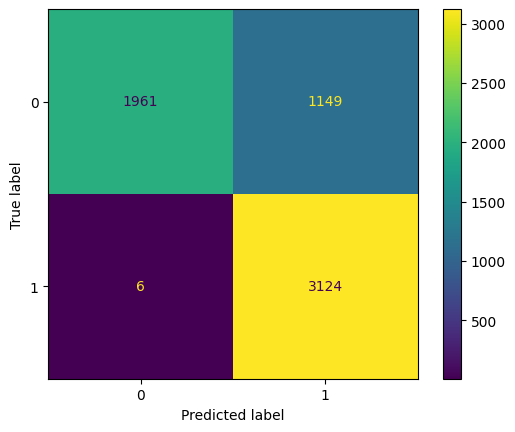

In [ ]:
conf_matrix(svc_best)

In [ ]:
class_report(svc_best)

              precision    recall  f1-score   support

           0       1.00      0.63      0.77      3110
           1       0.73      1.00      0.84      3130

    accuracy                           0.81      6240
   macro avg       0.86      0.81      0.81      6240
weighted avg       0.86      0.81      0.81      6240



# Decision Tree

Normal Fit

In [ ]:
model_dt = DecisionTreeClassifier()
train(model_dt, 'Decision Tree')

Training accuracy of Decision Tree is 1.0
testing accuracy of Decision Tree is 0.9910256410256411


Cross-Validation

In [ ]:

# Perform cross-validation
cross_val_scores_train = cross_val_score(
    DecisionTreeClassifier(),
    X_train,
    y_train,
    cv=10
)


cross_val_scores_test = cross_val_score(
    DecisionTreeClassifier(),
    X_test,
    y_test,
    cv=10
)


print(f"Cross-validation scores: {cross_val_scores_train}")
print(f"Mean cross-validation score: {cross_val_scores_train.mean()}")

print(f"Cross-validation scores: {cross_val_scores_test}")
print(f"Mean cross-validation score: {cross_val_scores_test.mean()}")

Cross-validation scores: [0.99450549 0.99038462 0.99381868 0.99313187 0.99175824 0.99244505
 0.98832418 0.99381868 0.98832418 0.9896978 ]
Mean cross-validation score: 0.9916208791208792
Cross-validation scores: [0.98557692 0.98397436 0.98878205 0.99038462 0.98397436 0.99519231
 0.98717949 0.99038462 0.98878205 0.98397436]
Mean cross-validation score: 0.987820512820513


Cross-Validation + Regularization

In [ ]:
# Perform cross-validation
cross_val_scores_reg_train = cross_val_score(
    DecisionTreeClassifier(max_depth=1),
    X_train,
    y_train,
    cv=10
)

cross_val_scores_reg_test = cross_val_score(
    DecisionTreeClassifier(max_depth=1),
    X_test,
    y_test,
    cv=10
)

print(f"Cross-validation scores: {cross_val_scores_reg_train}")
print(f"Mean cross-validation score: {cross_val_scores_reg_train.mean()}")

print(f"Cross-validation scores: {cross_val_scores_reg_test}")
print(f"Mean cross-validation score: {cross_val_scores_reg_test.mean()}")

Cross-validation scores: [0.80975275 0.7967033  0.80494505 0.80631868 0.78708791 0.80357143
 0.80013736 0.7918956  0.7967033  0.80151099]
Mean cross-validation score: 0.7998626373626373
Cross-validation scores: [0.8125     0.78846154 0.80929487 0.78525641 0.80769231 0.77564103
 0.79967949 0.81730769 0.78205128 0.80929487]
Mean cross-validation score: 0.7987179487179488


Regularization

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for hyperparameter search
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Perform randomized search for hyperparameter tuning
random_search = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_grid,
    cv=5
)
random_search.fit(X_train, y_train)

# Print best hyperparameters and mean cross-validation score
print("Best Hyperparameters: ", random_search.best_params_)
print("Mean Cross-validation Score: ", random_search.best_score_)

# Train and evaluate the model with the best hyperparameters
best_model_dt = random_search.best_estimator_
train(best_model_dt, 'Decision Tree')


Best Hyperparameters:  {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': None}
Mean Cross-validation Score:  0.9905219780219781
Training accuracy of Decision Tree is 0.9946428571428572
testing accuracy of Decision Tree is 0.9900641025641026


In [ ]:
for i in np.arange(1,30,1):
  print(i)
  train(DecisionTreeClassifier(max_depth=i), 'DT')


1
Training accuracy of DT is 0.801510989010989
testing accuracy of DT is 0.795352564102564
2
Training accuracy of DT is 0.9245192307692308
testing accuracy of DT is 0.9145833333333333
3
Training accuracy of DT is 0.9316620879120879
testing accuracy of DT is 0.9216346153846153
4
Training accuracy of DT is 0.9360576923076923
testing accuracy of DT is 0.9261217948717949
5
Training accuracy of DT is 0.9410027472527472
testing accuracy of DT is 0.9310897435897436
6
Training accuracy of DT is 0.9491758241758241
testing accuracy of DT is 0.9384615384615385
7
Training accuracy of DT is 0.9526098901098901
testing accuracy of DT is 0.9413461538461538
8
Training accuracy of DT is 0.9554258241758242
testing accuracy of DT is 0.9439102564102564
9
Training accuracy of DT is 0.9580357142857143
testing accuracy of DT is 0.9464743589743589
10
Training accuracy of DT is 0.9604395604395605
testing accuracy of DT is 0.9477564102564102
11
Training accuracy of DT is 0.9626373626373627
testing accuracy of DT

In [ ]:
model_dt = DecisionTreeClassifier(max_depth=2, min_samples_split=20)
train(model_dt, 'Decision Tree')

Training accuracy of Decision Tree is 0.9205357142857142
testing accuracy of Decision Tree is 0.9237179487179488


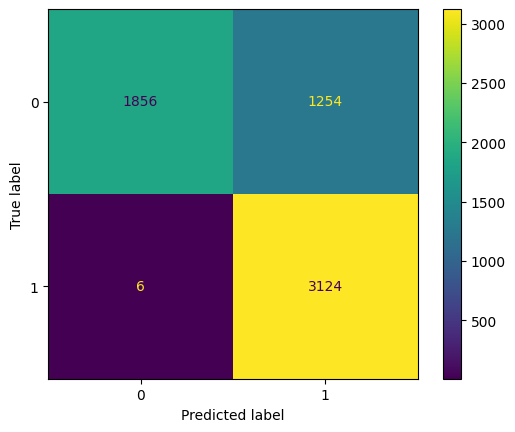

In [ ]:
conf_matrix(model_dt)

In [ ]:
class_report(model_dt)

              precision    recall  f1-score   support

           0       1.00      0.60      0.75      3110
           1       0.71      1.00      0.83      3130

    accuracy                           0.80      6240
   macro avg       0.86      0.80      0.79      6240
weighted avg       0.85      0.80      0.79      6240



# Graph-DT

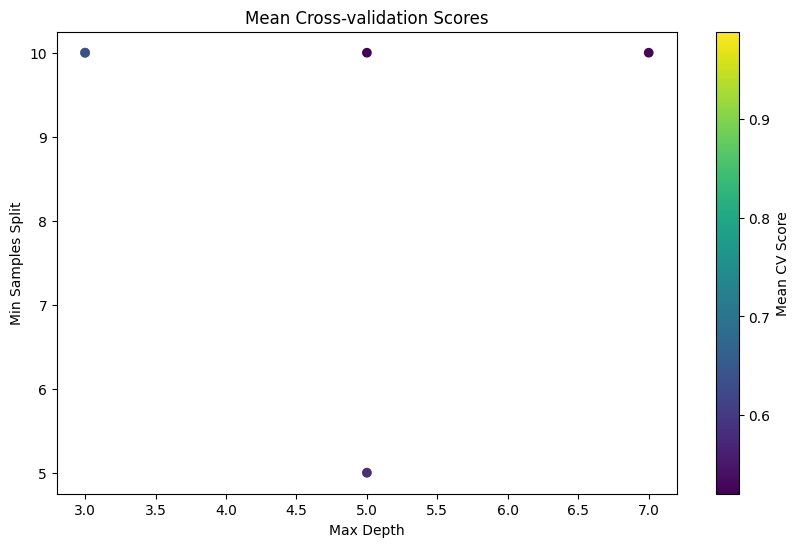

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the randomized search results
results = random_search.cv_results_
params = results['params']
mean_scores = results['mean_test_score']

# Extract the values of the hyperparameters
max_depths = [param['max_depth'] for param in params]
min_samples_splits = [param['min_samples_split'] for param in params]

# Create a figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the mean cross-validation scores
sc = ax.scatter(max_depths, min_samples_splits, c=mean_scores, cmap='viridis')
ax.set_xlabel('Max Depth')
ax.set_ylabel('Min Samples Split')
ax.set_title('Mean Cross-validation Scores')

# Add colorbar
cbar = plt.colorbar(sc)
cbar.set_label('Mean CV Score')

plt.show()


In [ ]:
# final model - without parameters
tree_final_model=DecisionTreeClassifier()
tree_final_model.fit(X_train,y_train)
tree_training_acc = tree_final_model.score(X_train,y_train)
tree_testing_acc = tree_final_model.score(X_test,y_test)
print(f"Training accuracy of DesicionTreeClassifier is {tree_training_acc}")
print(f"testing accuracy of DesicionTreeClassifier is {tree_testing_acc}")

Training accuracy of DesicionTreeClassifier is 1.0
testing accuracy of DesicionTreeClassifier is 0.9931089743589744


In [ ]:
# final model - with parameters
tree_final_model=DecisionTreeClassifier(max_depth=58,random_state=42)
tree_final_model.fit(X_train,y_train)
tree_training_acc = tree_final_model.score(X_train,y_train)
tree_testing_acc = tree_final_model.score(X_test,y_test)
print(f"Training accuracy of DesicionTreeClassifier is {tree_training_acc}")
print(f"testing accuracy of DesicionTreeClassifier is {tree_testing_acc}")

Training accuracy of DesicionTreeClassifier is 0.9978708791208791
testing accuracy of DesicionTreeClassifier is 0.9951923076923077


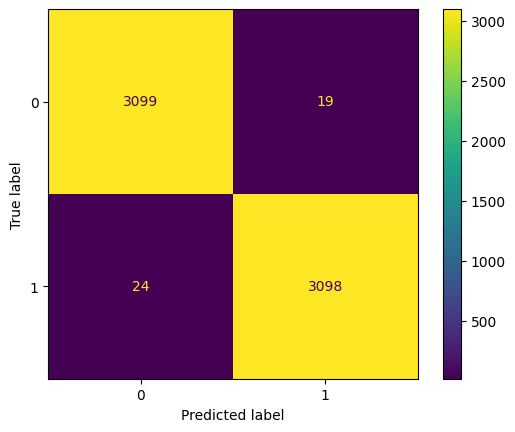

In [ ]:
conf_matrix(tree_final_model)

In [ ]:
class_report(tree_final_model)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3118
           1       0.99      0.99      0.99      3122

    accuracy                           0.99      6240
   macro avg       0.99      0.99      0.99      6240
weighted avg       0.99      0.99      0.99      6240



# Naive Bayes

Normal Fit

In [ ]:
Naive = naive_bayes.MultinomialNB()

In [ ]:
train(Naive, 'Naive Bayes')

Training accuracy of Naive Bayes is 0.9604395604395605
testing accuracy of Naive Bayes is 0.9548076923076924


Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_scores_naive_train= cross_val_score(naive_bayes.MultinomialNB(), X_train, y_train, cv=10)
cross_val_scores_naive_test= cross_val_score(naive_bayes.MultinomialNB(), X_test, y_test, cv=10)

print(f"Cross-validation scores: {cross_val_scores_naive_train}")
print(f"Mean cross-validation score: {cross_val_scores_naive_train.mean()}")

print(f"Cross-validation scores: {cross_val_scores_naive_test}")
print(f"Mean cross-validation score: {cross_val_scores_naive_test.mean()}")

Cross-validation scores: [0.95535714 0.95123626 0.96016484 0.95260989 0.94711538 0.95398352
 0.95054945 0.95054945 0.95604396 0.94917582]
Mean cross-validation score: 0.9526785714285715
Cross-validation scores: [0.96634615 0.96474359 0.96794872 0.97596154 0.97275641 0.96314103
 0.9775641  0.97435897 0.97435897 0.95512821]
Mean cross-validation score: 0.9692307692307691


Cross-Validation + Regularization

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_scores_naive_reg_train = cross_val_score(naive_bayes.MultinomialNB(alpha=40), X_train, y_train, cv=2)
cross_val_scores_naive_reg_test = cross_val_score(naive_bayes.MultinomialNB(alpha=40), X_test, y_test, cv=2)


print(f"Cross-validation scores: {cross_val_scores_naive_reg_train}")
print(f"Mean cross-validation score: {cross_val_scores_naive_reg_train.mean()}")

print(f"Cross-validation scores: {cross_val_scores_naive_reg_test}")
print(f"Mean cross-validation score: {cross_val_scores_naive_reg_test.mean()}")

Cross-validation scores: [0.94793956 0.95123626]
Mean cross-validation score: 0.949587912087912
Cross-validation scores: [0.92307692 0.94423077]
Mean cross-validation score: 0.9336538461538462


FINAL

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB

# Instantiate the MultinomialNB classifier
naive_reg = MultinomialNB(alpha=40)

# Perform cross-validation and get predicted values for training set
y_train_pred = cross_val_predict(naive_reg, X_train, y_train, cv=2)

# Perform cross-validation and get predicted values for test set
y_test_pred = cross_val_predict(naive_reg, X_test, y_test, cv=2)

# Calculate and print the confusion matrix for training set
cm_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix (Training Set):")
print(cm_train)

# Calculate and print the confusion matrix for test set
cm_test = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix (Test Set):")
print(cm_test)

# Calculate and print the classification report for training set
cr_train = classification_report(y_train, y_train_pred)
print("\nClassification Report (Training Set):")
print(cr_train)

# Calculate and print the classification report for test set
cr_test = classification_report(y_test, y_test_pred)
print("\nClassification Report (Test Set):")
print(cr_test)


Confusion Matrix (Training Set):
[[7074  203]
 [ 531 6752]]

Confusion Matrix (Test Set):
[[2969  141]
 [ 273 2857]]

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7277
           1       0.97      0.93      0.95      7283

    accuracy                           0.95     14560
   macro avg       0.95      0.95      0.95     14560
weighted avg       0.95      0.95      0.95     14560


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      3110
           1       0.95      0.91      0.93      3130

    accuracy                           0.93      6240
   macro avg       0.93      0.93      0.93      6240
weighted avg       0.93      0.93      0.93      6240



Regularization

In [ ]:
Naive_reg = naive_bayes.MultinomialNB(alpha=0.1)
train(Naive_reg, "Naive Bayes")

Training accuracy of Naive Bayes is 0.9857142857142858
testing accuracy of Naive Bayes is 0.9748397435897436


Confusion matrix (Test data):
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      3099
           1       0.97      0.96      0.97      3141

    accuracy                           0.97      6240
   macro avg       0.97      0.97      0.97      6240
weighted avg       0.97      0.97      0.97      6240



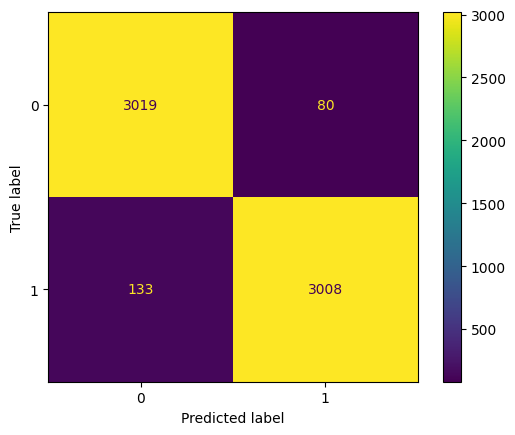

In [ ]:
#best model with cross-vlidation+regularization
from sklearn.metrics import accuracy_score , ConfusionMatrixDisplay , classification_report , roc_curve

from sklearn.model_selection import cross_val_predict
naive_bayes_classifier = naive_bayes.MultinomialNB(alpha=40)
#

predicted_train = cross_val_predict(naive_bayes_classifier, X_train, y_train, cv=2)
predicted_test = cross_val_predict(naive_bayes_classifier, X_test, y_test, cv=2)

naive_bayes_classifier.fit(X_test, y_test)
confusion_matrix_test=ConfusionMatrixDisplay.from_estimator(
        naive_bayes_classifier,
        X_test,
        y_test
    )
# confusion_matrix_train = conf_matrix(y_train, predicted_train)
# confusion_matrix_test = conf_matrix(y_test, predicted_test)

# print("Confusion matrix (Training data):")
# print(confusion_matrix_train)
print("Confusion matrix (Test data):")
print(confusion_matrix_test)
class_report(naive_bayes_classifier)

In [ ]:
for i in np.arange(1,40,2):
  print(i)
  train(naive_bayes.MultinomialNB(alpha=i,force_alpha=True), 'NB')


In [ ]:
conf_matrix(cross_val_scores_naive_test)

ValueError: ignored

In [ ]:
class_report(naive_bayes_classifier)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      3099
           1       0.97      0.96      0.97      3141

    accuracy                           0.97      6240
   macro avg       0.97      0.97      0.97      6240
weighted avg       0.97      0.97      0.97      6240



# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier;

knn = KNeighborsClassifier(n_neighbors=3);

# training our classifier ; train_data.target will be having numbers assigned for each category in train data
classifier = knn.fit(X_train,y_train)
train(knn,"KNN")

Training accuracy of KNN is 0.8632554945054945
testing accuracy of KNN is 0.8123397435897436


In [ ]:
from sklearn.neighbors import KNeighborsClassifier;

knn = KNeighborsClassifier(n_neighbors=8);

# training our classifier ; train_data.target will be having numbers assigned for each category in train data
classifier = knn.fit(X_train,y_train)
train(knn,"KNN")

KeyboardInterrupt: ignored

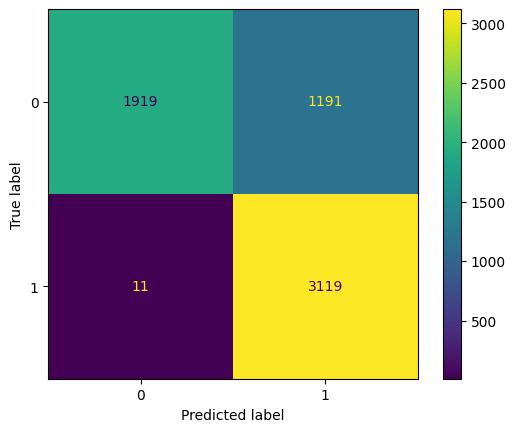

In [ ]:
conf_matrix(knn)

In [ ]:
class_report(knn)

              precision    recall  f1-score   support

           0       0.99      0.62      0.76      3110
           1       0.72      1.00      0.84      3130

    accuracy                           0.81      6240
   macro avg       0.86      0.81      0.80      6240
weighted avg       0.86      0.81      0.80      6240



# Voting Classifier(SVM, DT, NB) - Hard Voting

In [ ]:
VotingClassifiers = VotingClassifier(estimators=[('MultinomialNB',naive_reg), ('SVM',svc_best), ('decision tree',model_dt)], voting='hard',weights=[2,1,1])
VotingClassifiers.fit(X_train, y_train)

VotingClassifier(estimators=[('MultinomialNB', MultinomialNB(alpha=40)),
                             ('SVM', SVC(C=0.03, probability=True)),
                             ('decision tree',
                              DecisionTreeClassifier(max_depth=1,
                                                     min_samples_split=10))],
                 weights=[2, 1, 1])

In [ ]:
VotingClassifiers.score(X_train,y_train),

(0.9662774725274725,)

In [ ]:
VotingClassifiers.score(X_test,y_test)

0.9592948717948718

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred_test=VotingClassifiers.predict(X_test)
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)
print("Confusion matrix (Test data):")
print(confusion_matrix_test)

Confusion matrix (Test data):
[[3030   80]
 [ 174 2956]]


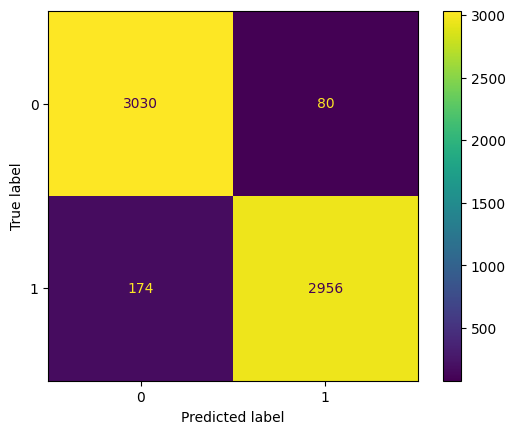

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_test)
disp.plot()

In [ ]:
class_report=(classification_report(
        y_test,
        y_pred_test
    ))
print(class_report)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3110
           1       0.97      0.94      0.96      3130

    accuracy                           0.96      6240
   macro avg       0.96      0.96      0.96      6240
weighted avg       0.96      0.96      0.96      6240



# AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
AdaBoost = AdaBoostClassifier(learning_rate=0.1,estimator = VotingClassifiers, algorithm='SAMME')
AdaBoost.fit(X_train, y_train)
print('Training score:',AdaBoost.score(X_train, y_train))
print('Testing score:',AdaBoost.score(X_test,y_test))

Training score: 0.5239697802197802
Testing score: 0.5261217948717949


# Gradient Boosting


In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
# model3 = GradientBoostingClassifier()
model3 = GradientBoostingClassifier(learning_rate= 0.1, n_estimators=5)
model3.fit(X_train,y_train)
print('Training score:',model3.score(X_train,y_train))
print('Testing score:',model3.score(X_test,y_test))

Training score: 0.9315934065934066
Testing score: 0.9216346153846153


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Obtain predicted labels for test data
gradient_predictions = model3.predict(X_test)

# Create confusion matrix
confusion_matrix_gradient_test = confusion_matrix(y_test, gradient_predictions)
print("Confusion matrix:")
print(confusion_matrix_gradient_test)

# Create classification report
class_report_gradient = classification_report(y_test, gradient_predictions)
print("Classification report:")
print(class_report_gradient)

Confusion matrix:
[[2624  486]
 [   3 3127]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.84      0.91      3110
           1       0.87      1.00      0.93      3130

    accuracy                           0.92      6240
   macro avg       0.93      0.92      0.92      6240
weighted avg       0.93      0.92      0.92      6240



# Bagging(DT)

In [ ]:
from sklearn.ensemble import BaggingClassifier
# bagging_model = BaggingClassifier(base_estimator=tree_final_model, n_estimators=10, random_state=42)
bagging_model = BaggingClassifier(estimator=model_dt)

# Fit the bagging classifier on the training data
bagging_model.fit(X_train, y_train)

# Predict using the bagging classifier
bagging_predictions = bagging_model.predict(X_test)

# Evaluate the bagging classifier
bagging_acc = accuracy_score(y_test, bagging_predictions)
print(f"Testing accuracy of BaggingClassifier is {bagging_acc}")

Testing accuracy of BaggingClassifier is 0.9237179487179488


In [ ]:
cross_val_scores = cross_val_score(bagging_model, X_train, y_train, cv=16)
# Print the cross-validation scores
print("Cross-validation scores:", cross_val_scores)
print("Mean cross-validation accuracy:", np.mean(cross_val_scores))


Cross-validation scores: [0.92857143 0.92747253 0.90989011 0.92967033 0.92967033 0.92967033
 0.91648352 0.91868132 0.91318681 0.91758242 0.91318681 0.91868132
 0.92637363 0.92417582 0.91318681 0.91098901]
Mean cross-validation accuracy: 0.920467032967033


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Obtain predicted labels for test data
bagging_predictions = bagging_model.predict(X_test)

# Create confusion matrix
confusion_matrix_test = confusion_matrix(y_test, bagging_predictions)
print("Confusion matrix:")
print(confusion_matrix_test)

# Create classification report
class_report = classification_report(y_test, bagging_predictions)
print("Classification report:")
print(class_report)


# Bagging -Ensemble

In [ ]:
from sklearn.ensemble import BaggingClassifier
bagging_model_ensemble = BaggingClassifier(base_estimator=VotingClassifiers, n_estimators=10, random_state=42)

# Fit the bagging classifier on the training data
bagging_model_ensemble.fit(X_train, y_train)

# Predict using the bagging classifier
bagging_predictions_ensemble = bagging_model_ensemble.predict(X_test)

# Evaluate the bagging classifier
bagging_acc = accuracy_score(y_test, bagging_predictions_ensemble)
print(f"Testing accuracy of BaggingClassifier is {bagging_acc}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Testing accuracy of BaggingClassifier is 0.9365384615384615


In [ ]:
# Obtain predicted labels for test data
# bagging_predictions_ensemble = bagging_model.predict(X_test)

# Create confusion matrix
confusion_matrix_test_bagging_ensemble = confusion_matrix(y_test, bagging_predictions_ensemble)
print("Confusion matrix:")
print(confusion_matrix_test_bagging_ensemble)

# Create classification report
class_report = classification_report(y_test, bagging_predictions_ensemble)
print("Classification report:")
print(class_report)


Confusion matrix:
[[3023   70]
 [ 326 2821]]
Classification report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      3093
           1       0.98      0.90      0.93      3147

    accuracy                           0.94      6240
   macro avg       0.94      0.94      0.94      6240
weighted avg       0.94      0.94      0.94      6240



In [ ]:
# # Create the base estimators
# # naive_bayes_model = BernoulliNB()
# # decision_tree_model = DecisionTreeClassifier(max_depth=58, random_state=42)
# # svm_model = SVC()

# # Create the bagging meta-estimator with the base estimators
# bagging_model = BaggingClassifier(base_estimator=None, n_estimators=10, random_state=1)

# # Set the base estimators for the bagging model
# bagging_model.base_estimator = [Naive, tree_final_model, svc_model]

# # Fit the bagging model on the training data
# bagging_model.fit(X_train, y_train)

# # Evaluate the bagging model
# train_score = bagging_model.score(X_train, y_train)
# test_score = bagging_model.score(X_test, y_test)

# print('Training score:', train_score)
# print('Testing score:', test_score)

In [ ]:
# from numpy import mean
# from numpy import std
# from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.ensemble import StackingClassifier
# from matplotlib import pyplot

# # get the dataset
# # def get_dataset():
# #  X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# #  return X, y

# # get a stacking ensemble of models
# def get_stacking():
#  # define the base models
#  level0 = list()
#  level0.append(('bayes', Naive))
#  level0.append(('DT', tree_final_model))
#  level0.append(('svm', svc_model))
#  # define meta learner model
#  level1 = LogisticRegression()
#  # define the stacking ensemble
#  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
#  return model

# # get a list of models to evaluate
# # def get_models():
# #  models = dict()
# #  models['lr'] = LogisticRegression()
# #  models['knn'] = KNeighborsClassifier()
# #  models['cart'] = DecisionTreeClassifier()
# #  models['svm'] = SVC()
# #  models['bayes'] = GaussianNB()
# #  models['stacking'] = get_stacking()
# #  return models

# # evaluate a give model using cross-validation
# def evaluate_model(model, X, y):
#  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
#  return scores

# # define dataset
# X, y = get_dataset()
# # get the models to evaluate
# models = get_models()
# # evaluate the models and store results
# results, names = list(), list()
# for name, model in models.items():
#  scores = evaluate_model(model, X, y)
#  results.append(scores)
#  names.append(name)
#  print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=names, showmeans=True)
# pyplot.show()

# Stacking Classifier

In [ ]:
level0 = list()
level0.append(('bayes', naive_reg))
level0.append(('DT', model_dt))
level0.append(('svm', svc_best))
 # define meta learner model
# level1 = LogisticRegression()

In [ ]:
model = StackingClassifier(estimators=level0)

In [ ]:
model.fit(X_train, y_train)


StackingClassifier(estimators=[('bayes', MultinomialNB(alpha=40)),
                               ('DT',
                                DecisionTreeClassifier(max_depth=1,
                                                       min_samples_split=10)),
                               ('svm', SVC(C=0.03, probability=True))])

In [ ]:
model.score(X_train, y_train)

0.9756181318681318

In [ ]:
model.score(X_test,y_test)

0.9658653846153846

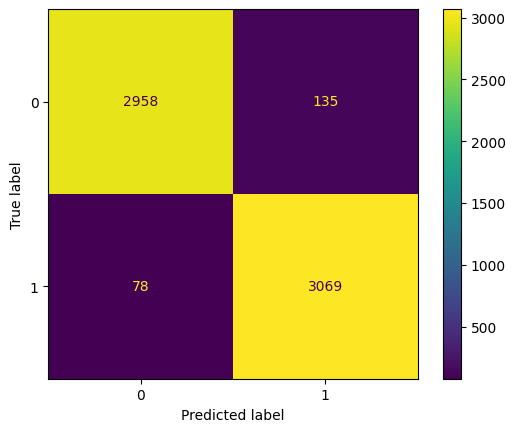

In [ ]:
conf_matrix(model)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Obtain predicted labels for test data
stacking_predictions = model.predict(X_test)

# Create confusion matrix
confusion_matrix_stacking_test = confusion_matrix(y_test, stacking_predictions)
print("Confusion matrix:")
print(confusion_matrix_stacking_test)

# Create classification report
class_report_stacking = classification_report(y_test, stacking_predictions)
print("Classification report:")
print(class_report_stacking)

Confusion matrix:
[[2958  135]
 [  78 3069]]
Classification report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      3093
           1       0.96      0.98      0.97      3147

    accuracy                           0.97      6240
   macro avg       0.97      0.97      0.97      6240
weighted avg       0.97      0.97      0.97      6240



# XGBClassifier


In [ ]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
xgb_classifier = xgb.XGBClassifier(alpha=0.1, n_estimators=10)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(alpha=0.1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [ ]:
xgb_classifier.score(X_train, y_train)

0.9508241758241758

In [ ]:
xgb_classifier.score(X_test, y_test)

0.9479166666666666

In [ ]:
y_train_pred = xgb_classifier.predict(X_train)
y_test_pred = xgb_classifier.predict(X_test)


In [ ]:
cm_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix (Training Set):")
print(cm_train)

cm_test = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix (Test Set):")
print(cm_test)


Confusion Matrix (Training Set):
[[6578  710]
 [   6 7266]]

Confusion Matrix (Test Set):
[[2776  323]
 [   2 3139]]


In [ ]:
cr_train = classification_report(y_train, y_train_pred)
print("\nClassification Report (Training Set):")
print(cr_train)

cr_test = classification_report(y_test, y_test_pred)
print("\nClassification Report (Test Set):")
print(cr_test)



Classification Report (Training Set):
              precision    recall  f1-score   support

           0       1.00      0.90      0.95      7288
           1       0.91      1.00      0.95      7272

    accuracy                           0.95     14560
   macro avg       0.96      0.95      0.95     14560
weighted avg       0.96      0.95      0.95     14560


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      0.90      0.94      3099
           1       0.91      1.00      0.95      3141

    accuracy                           0.95      6240
   macro avg       0.95      0.95      0.95      6240
weighted avg       0.95      0.95      0.95      6240

